In [2]:
# Standard modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

In [76]:
# Import data

nl_2017 = pd.read_csv("nl_data/2017_nl.csv")
nl_2017.head()

,Rk,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,1,LAD49.5,ARI28.5,ARI21.4,MIL6.9,LAD30.3,ATL4.3,CIN7.5,PHI3.4,COL7.1,LAD6.0,MIA5.4,COL5.7,MIA7.1,MIA16.5,LAD0.4,LAD2.3
1,2,ARI47.0,WSN25.5,WSN21.2,COL6.9,MIA29.6,CHC4.1,ARI5.5,LAD3.0,LAD6.1,CIN4.3,STL4.7,MIA4.0,WSN4.2,NYM10.5,ARI0.3,CHC1.9
2,3,WSN46.1,COL21.2,COL15.0,ARI6.5,CHC27.5,MIA3.5,CHC4.3,WSN2.9,WSN6.0,WSN3.4,NYM4.0,NYM3.9,ARI4.1,STL9.4,MIA0.3,STL1.6
3,4,CHC42.4,LAD19.2,LAD13.3,PIT6.2,CIN23.7,LAD3.3,ATL4.2,MIA2.8,CHC5.8,CHC3.3,PHI2.6,STL3.3,LAD3.5,ARI7.4,NYM0.2,MIL1.5
4,5,COL38.0,MIL17.7,MIL11.0,LAD6.1,STL23.0,SFG3.1,STL3.2,STL2.6,MIL4.1,MIL2.8,LAD2.5,ATL3.0,MIL3.2,LAD7.4,SFG0.2,NYM1.2


In [77]:
# Remove unneeded rows and columns. 

nl_2017 = nl_2017.drop(nl_2017.index[15])
nl_2017 = nl_2017.drop('Rk', axis = 1)
nl_2017.head()

,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,LAD49.5,ARI28.5,ARI21.4,MIL6.9,LAD30.3,ATL4.3,CIN7.5,PHI3.4,COL7.1,LAD6.0,MIA5.4,COL5.7,MIA7.1,MIA16.5,LAD0.4,LAD2.3
1,ARI47.0,WSN25.5,WSN21.2,COL6.9,MIA29.6,CHC4.1,ARI5.5,LAD3.0,LAD6.1,CIN4.3,STL4.7,MIA4.0,WSN4.2,NYM10.5,ARI0.3,CHC1.9
2,WSN46.1,COL21.2,COL15.0,ARI6.5,CHC27.5,MIA3.5,CHC4.3,WSN2.9,WSN6.0,WSN3.4,NYM4.0,NYM3.9,ARI4.1,STL9.4,MIA0.3,STL1.6
3,CHC42.4,LAD19.2,LAD13.3,PIT6.2,CIN23.7,LAD3.3,ATL4.2,MIA2.8,CHC5.8,CHC3.3,PHI2.6,STL3.3,LAD3.5,ARI7.4,NYM0.2,MIL1.5
4,COL38.0,MIL17.7,MIL11.0,LAD6.1,STL23.0,SFG3.1,STL3.2,STL2.6,MIL4.1,MIL2.8,LAD2.5,ATL3.0,MIL3.2,LAD7.4,SFG0.2,NYM1.2


In [78]:
# Put each column in the same order, so the values for each team are in the same row.

columns = list(nl_2017.columns)

for column in columns:
    column_list = list(nl_2017[column])
    sorted_column_list = sorted(column_list)
    
    for i in range(0,15):
        nl_2017[column][i] = sorted_column_list[i]

nl_2017.head()

,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI47.0,ARI28.5,ARI21.4,ARI6.5,ARI18.5,ARI0.5,ARI5.5,ARI1.3,ARI1.3,ARI1.1,ARI0.4,ARI2.9,ARI4.1,ARI7.4,ARI0.3,ARI1.1
1,ATL20.4,ATL6.7,ATL5.2,ATL2.2,ATL13.7,ATL4.3,ATL4.2,ATL2.0,ATL0.7,ATL0.0,ATL-1.5,ATL3.0,ATL0.6,ATL2.1,ATL0.0,ATL0.4
2,CHC42.4,CHC14.9,CHC9.5,CHC5.5,CHC27.5,CHC4.1,CHC4.3,CHC2.3,CHC5.8,CHC3.3,CHC1.0,CHC2.0,CHC2.8,CHC5.8,CHC0.0,CHC1.9
3,CIN21.6,CIN-2.1,CIN-1.7,CIN0.6,CIN23.7,CIN2.0,CIN7.5,CIN1.1,CIN3.7,CIN4.3,CIN1.8,CIN1.0,CIN1.4,CIN4.2,CIN0.1,CIN0.8
4,COL38.0,COL21.2,COL15.0,COL6.9,COL16.8,COL0.4,COL0.5,COL2.5,COL7.1,COL2.2,COL-0.5,COL5.7,COL-0.5,COL4.7,COL0.0,COL-0.6


In [79]:
#Add a new 'Team' column.

teams_list = []
for i in range(0,15):
    teams_list += [nl_2017['Total'][i][0:3]]
    
nl_2017.insert(loc = 0, column = 'Team', value = teams_list)
nl_2017.head()

,Team,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,ARI47.0,ARI28.5,ARI21.4,ARI6.5,ARI18.5,ARI0.5,ARI5.5,ARI1.3,ARI1.3,ARI1.1,ARI0.4,ARI2.9,ARI4.1,ARI7.4,ARI0.3,ARI1.1
1,ATL,ATL20.4,ATL6.7,ATL5.2,ATL2.2,ATL13.7,ATL4.3,ATL4.2,ATL2.0,ATL0.7,ATL0.0,ATL-1.5,ATL3.0,ATL0.6,ATL2.1,ATL0.0,ATL0.4
2,CHC,CHC42.4,CHC14.9,CHC9.5,CHC5.5,CHC27.5,CHC4.1,CHC4.3,CHC2.3,CHC5.8,CHC3.3,CHC1.0,CHC2.0,CHC2.8,CHC5.8,CHC0.0,CHC1.9
3,CIN,CIN21.6,CIN-2.1,CIN-1.7,CIN0.6,CIN23.7,CIN2.0,CIN7.5,CIN1.1,CIN3.7,CIN4.3,CIN1.8,CIN1.0,CIN1.4,CIN4.2,CIN0.1,CIN0.8
4,COL,COL38.0,COL21.2,COL15.0,COL6.9,COL16.8,COL0.4,COL0.5,COL2.5,COL7.1,COL2.2,COL-0.5,COL5.7,COL-0.5,COL4.7,COL0.0,COL-0.6


In [80]:
#Add a 'Year' column. Only needed for a larger analysis using data from different seasons.

year = 15*['2017']
nl_2017.insert(loc = 1, column = 'Year', value = year)
nl_2017.head()

,Team,Year,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,2017,ARI47.0,ARI28.5,ARI21.4,ARI6.5,ARI18.5,ARI0.5,ARI5.5,ARI1.3,ARI1.3,ARI1.1,ARI0.4,ARI2.9,ARI4.1,ARI7.4,ARI0.3,ARI1.1
1,ATL,2017,ATL20.4,ATL6.7,ATL5.2,ATL2.2,ATL13.7,ATL4.3,ATL4.2,ATL2.0,ATL0.7,ATL0.0,ATL-1.5,ATL3.0,ATL0.6,ATL2.1,ATL0.0,ATL0.4
2,CHC,2017,CHC42.4,CHC14.9,CHC9.5,CHC5.5,CHC27.5,CHC4.1,CHC4.3,CHC2.3,CHC5.8,CHC3.3,CHC1.0,CHC2.0,CHC2.8,CHC5.8,CHC0.0,CHC1.9
3,CIN,2017,CIN21.6,CIN-2.1,CIN-1.7,CIN0.6,CIN23.7,CIN2.0,CIN7.5,CIN1.1,CIN3.7,CIN4.3,CIN1.8,CIN1.0,CIN1.4,CIN4.2,CIN0.1,CIN0.8
4,COL,2017,COL38.0,COL21.2,COL15.0,COL6.9,COL16.8,COL0.4,COL0.5,COL2.5,COL7.1,COL2.2,COL-0.5,COL5.7,COL-0.5,COL4.7,COL0.0,COL-0.6


In [81]:
#Remove team name from each entry and convert to float. Minor annoyance that the entry could have a "-" after the team name.
# THIS IS WRONG THOSE ARE NEGATIVES

for column in columns:
    for i in range(0,15):
        if nl_2017[column][i][3] == "-":
            nl_2017[column][i] = float(nl_2017[column][i][4:])
        else:
            nl_2017[column][i] = float(nl_2017[column][i][3:])
            
nl_2017.head()   

,Team,Year,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,2017,47,28.5,21.4,6.5,18.5,0.5,5.5,1.3,1.3,1.1,0.4,2.9,4.1,7.4,0.3,1.1
1,ATL,2017,20.4,6.7,5.2,2.2,13.7,4.3,4.2,2,0.7,0,1.5,3,0.6,2.1,0,0.4
2,CHC,2017,42.4,14.9,9.5,5.5,27.5,4.1,4.3,2.3,5.8,3.3,1,2,2.8,5.8,0,1.9
3,CIN,2017,21.6,2.1,1.7,0.6,23.7,2,7.5,1.1,3.7,4.3,1.8,1,1.4,4.2,0.1,0.8
4,COL,2017,38,21.2,15,6.9,16.8,0.4,0.5,2.5,7.1,2.2,0.5,5.7,0.5,4.7,0,0.6


In [3]:
#Need to add a column for team wins.
#Load standings data

standings_2017 = pd.read_csv("mlb_standings/2017_standings.csv")
standings_2017

,Rk,Tm,Lg,G,W,L,W-L%,R,RA,Rdiff,...,Luck,Inter,Home,Road,ExInn,1Run,vRHP,vLHP,=.500,<.500
0,1.0,LAD,NL,162.0,104,58,0.642,4.8,3.6,1.2,...,2.0,16-4,57-24,47-34,8-4,25-19,71-43,33-15,36-33,68-25
1,2.0,CLE,AL,162.0,102,60,0.630,5.0,3.5,1.6,...,-6.0,6-14,49-32,53-28,4-2,20-15,66-36,36-24,27-22,75-38
2,3.0,HOU,AL,162.0,101,61,0.624,5.5,4.3,1.2,...,2.0,15-5,48-33,53-28,4-4,19-13,80-37,21-24,18-15,83-46
3,4.0,WSN,NL,162.0,97,65,0.599,5.1,4.1,0.9,...,1.0,10-10,47-34,50-31,7-4,30-21,75-50,22-15,23-19,74-46
4,5.0,BOS,AL,162.0,93,69,0.574,4.8,4.1,0.7,...,0.0,16-4,48-33,45-36,15-3,22-19,75-50,18-19,27-23,66-46
5,6.0,ARI,NL,162.0,93,69,0.574,5.0,4.1,0.9,...,-3.0,12-8,52-29,41-40,9-3,29-23,68-52,25-17,39-35,54-34
6,7.0,CHC,NL,162.0,92,70,0.568,5.1,4.3,0.8,...,-1.0,12-8,48-33,44-37,7-3,26-17,71-56,21-14,35-35,57-35
7,8.0,NYY,AL,162.0,91,71,0.562,5.3,4.1,1.2,...,-9.0,15-5,51-30,40-41,5-6,18-26,67-48,24-23,26-22,65-49
8,9.0,COL,NL,162.0,87,75,0.537,5.1,4.7,0.4,...,0.0,10-10,46-35,41-40,2-3,21-14,59-55,28-20,37-35,50-40
9,10.0,MIL,NL,162.0,86,76,0.531,4.5,4.3,0.2,...,1.0,11-9,46-38,40-38,5-11,25-22,69-59,17-17,37-38,49-38


In [83]:
#Extract NL team with wins as a list with the alphabetical order

team_wins = []
for i in range(0,30):
    team = standings_2017['Tm'][i]
    league = standings_2017['Lg'][i]
    wins = float(standings_2017['W'][i])
    if league == 'NL':
        team_wins += [(team, wins)]
team_wins = sorted(team_wins)

sorted_wins = []
for i in range(0,15):
    wins = team_wins[i][1]
    sorted_wins += [wins]

In [84]:
#Add the wins column.

nl_2017.insert(loc = 2, column = 'Wins', value = sorted_wins)
nl_2017.head()

,Team,Year,Wins,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,2017,93.0,47,28.5,21.4,6.5,18.5,0.5,5.5,1.3,1.3,1.1,0.4,2.9,4.1,7.4,0.3,1.1
1,ATL,2017,72.0,20.4,6.7,5.2,2.2,13.7,4.3,4.2,2,0.7,0,1.5,3,0.6,2.1,0,0.4
2,CHC,2017,92.0,42.4,14.9,9.5,5.5,27.5,4.1,4.3,2.3,5.8,3.3,1,2,2.8,5.8,0,1.9
3,CIN,2017,68.0,21.6,2.1,1.7,0.6,23.7,2,7.5,1.1,3.7,4.3,1.8,1,1.4,4.2,0.1,0.8
4,COL,2017,87.0,38,21.2,15,6.9,16.8,0.4,0.5,2.5,7.1,2.2,0.5,5.7,0.5,4.7,0,0.6


In [85]:
#Rename Total column to 'Team WAR.' Change spelling of others

columns = list(nl_2017.columns)
new_columns = columns
new_columns[3] = 'TeamWAR'
new_columns[4] = 'AllP'
nl_2017.columns = new_columns
nl_2017.head()

,Team,Year,Wins,TeamWAR,AllP,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,ARI,2017,93.0,47,28.5,21.4,6.5,18.5,0.5,5.5,1.3,1.3,1.1,0.4,2.9,4.1,7.4,0.3,1.1
1,ATL,2017,72.0,20.4,6.7,5.2,2.2,13.7,4.3,4.2,2,0.7,0,1.5,3,0.6,2.1,0,0.4
2,CHC,2017,92.0,42.4,14.9,9.5,5.5,27.5,4.1,4.3,2.3,5.8,3.3,1,2,2.8,5.8,0,1.9
3,CIN,2017,68.0,21.6,2.1,1.7,0.6,23.7,2,7.5,1.1,3.7,4.3,1.8,1,1.4,4.2,0.1,0.8
4,COL,2017,87.0,38,21.2,15,6.9,16.8,0.4,0.5,2.5,7.1,2.2,0.5,5.7,0.5,4.7,0,0.6


According to Baseball Reference, the standard conversion for Team WAR to wins is 
<center>wins = Team WAR + .294 * 162.</center>
This has the advantage that is can be used at any point in the season by replacing 162 with games played. We will start by doing a linear regression with the data from NL 2017 and compare the results. 




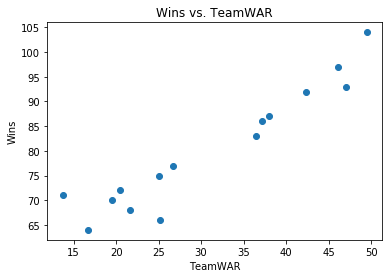

In [86]:
# Scatter plot of Team WAR and Wins

team_war_values = nl_2017['TeamWAR']
wins_values = nl_2017['Wins']

plt.scatter(team_war_values, wins_values)
plt.title('Wins vs. TeamWAR')
plt.xlabel('TeamWAR')
plt.ylabel('Wins')
plt.show()

In [87]:
# Regression line
X = pd.DataFrame(nl_2017['TeamWAR'])
y = nl_2017['Wins']
lm = linear_model.LinearRegression()
lm.fit(X, y)
coefficient = float(lm.coef_)
intercept = float(lm.intercept_)
print(coefficient)
print(intercept)

0.9855444799096503
49.74203267693778


In [88]:
# BR model for estimating wins

def br_wins(team_war):
    return team_war + .294 * 162

In [89]:
# New df comparing wins and the two estimates

teams = nl_2017['Team']
wins = nl_2017['Wins']
reg_wins_est = lm.predict(X)
br_wins_est = [br_wins(team_war) for team_war in nl_2017['TeamWAR']]
win_estimates = pd.DataFrame(list(zip(teams, wins, reg_wins_est, br_wins_est)), columns = ['Team', 'Wins', 'RegWins', 'BRWins'])
win_estimates.head()

,Team,Wins,RegWins,BRWins
0,ARI,93.0,96.062623,94.628
1,ATL,72.0,69.847140,68.028
2,CHC,92.0,91.529119,90.028
3,CIN,68.0,71.029793,69.228
4,COL,87.0,87.192723,85.628


In [90]:
# Compute R^2 for the two estimates
print('Regression estimate R^2 score:')
print(r2_score(wins, reg_wins_est))
print('BR estimate R^2 score:')
print(r2_score(wins, br_wins_est))


Regression estimate R^2 score:
0.904400909384
BR estimate R^2 score:
0.88481540087


The sample size is really too small for regression analysis, and certainly too small for the two variable analysis we are about to do. However, this is just to get an idea of how things go. We will do a similar analysis with more data later. 

In [91]:
X_ref = nl_2017.filter(['AllP', 'Non-P'], axis = 1)
y = nl_2017['Wins']
lm.fit(X_ref,y)
refined_prediction = list(lm.predict(X_ref))
win_estimates.insert(loc = 4, column = 'RefRegWins', value = refined_prediction)
win_estimates.head()

,Team,Wins,RegWins,BRWins,RefRegWins
0,ARI,93.0,96.062623,94.628,96.435381
1,ATL,72.0,69.847140,68.028,68.980372
2,CHC,92.0,91.529119,90.028,90.413188
3,CIN,68.0,71.029793,69.228,73.383905
4,COL,87.0,87.192723,85.628,87.155937


In [92]:
print(lm.coef_)
print(lm.intercept_)


[ 1.05553621  0.92589995]
49.2234500268


In [69]:
# Check the refined score
print('Regression estimate R^2 score:')
print(r2_score(wins, refined_prediction))

Regression estimate R^2 score:
0.880735426236
